In [103]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import plotly.express as px
import alpaca_trade_api as tradeapi
from alpaca_trade_api.rest import REST, TimeFrame
import pandas as pd
import numpy as np
%matplotlib inline

In [40]:
# Load .env enviroment variables
load_dotenv()

True

In [41]:
alpaca_api_key = os.getenv("ALPACA_KEY")
alpaca_code = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_code,
    api_version = "v2"
)

In [42]:
api = REST(key_id=alpaca_api_key,secret_key=alpaca_code,base_url="https://paper-api.alpaca.markets")

In [43]:
btcbars = api.get_crypto_bars("BTCUSD", TimeFrame.Day, "2021-01-25", "2022-04-01").df
btcbars.head()

,exchange,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,,
2021-01-25 06:00:00+00:00,CBSE,32260.52,32845.16,31435.34,32090.10,6272.467285,64515,32174.181483
2021-01-25 06:00:00+00:00,FTXU,33483.00,34846.00,31501.00,32287.00,1322.173100,591,32769.558103
2021-01-26 06:00:00+00:00,CBSE,32510.82,32584.62,31420.69,31551.72,4995.556010,56671,31996.651684
2021-01-26 06:00:00+00:00,FTXU,31936.00,32830.00,30900.00,31526.00,455.974100,483,31636.023453
2021-01-27 06:00:00+00:00,CBSE,31556.28,31936.16,29200.00,30407.13,38417.931930,298822,30656.520271


In [45]:
btcbars = btcbars.loc[btcbars['exchange'] == 'CBSE']
btcbars.drop(columns = ['exchange', 'open', 'high', 'low', 'volume', 'trade_count', 'vwap'], inplace=True)
btcbars = btcbars.rename(columns={
    "close": "BTC_close"
})
btcbars['timestamp'] = btcbars.index.date
btcbars = btcbars.set_index(btcbars['timestamp'])
btcbars.drop(columns = ['timestamp'], inplace=True)

                               
btcbars

,BTC_close
timestamp,
2021-01-25,32090.10
2021-01-26,31551.72
2021-01-27,30407.13
2021-01-28,33052.81
2021-01-29,34262.11
...,...
2022-03-28,47624.51
2022-03-29,47255.62
2022-03-30,47031.64


In [46]:
ethbars = api.get_crypto_bars("ETHUSD", TimeFrame.Day, "2021-01-25", "2022-04-01").df

In [47]:
ethbars = ethbars.loc[ethbars['exchange'] == 'CBSE']
ethbars.drop(columns = ['exchange', 'open', 'high', 'low', 'volume', 'trade_count', 'vwap'], inplace=True)
ethbars = ethbars.rename(columns={
    "close": "ETH_close"
})
ethbars['timestamp'] = ethbars.index.date
ethbars = ethbars.set_index(ethbars['timestamp'])
ethbars.drop(columns = ['timestamp'], inplace=True)

    
ethbars

,ETH_close
timestamp,
2021-01-25,1317.97
2021-01-26,1286.15
2021-01-27,1240.96
2021-01-28,1305.38
2021-01-29,1379.87
...,...
2022-03-28,3391.14
2022-03-29,3373.30
2022-03-30,3391.53


In [48]:
solbars = api.get_crypto_bars("SOLUSD", TimeFrame.Day, "2021-01-25", "2022-04-01").df

In [49]:
solbars.drop(columns = ['exchange', 'open', 'high', 'low', 'volume', 'trade_count', 'vwap'], inplace=True)
solbars = solbars.rename(columns={
    "close": "SOL_close"
})
solbars['timestamp'] = solbars.index.date
solbars = solbars.set_index(solbars['timestamp'])
solbars.drop(columns = ['timestamp'], inplace=True)

                               
solbars

,SOL_close
timestamp,
2021-01-25,3.8050
2021-01-26,3.7500
2021-01-27,3.7450
2021-01-28,3.6900
2021-01-29,3.8325
...,...
2022-03-28,111.2500
2022-03-29,110.1425
2022-03-30,120.8725


In [50]:
bchbars = api.get_crypto_bars("BCHUSD", TimeFrame.Day, "2021-01-25", "2022-04-01").df

In [51]:
bchbars = bchbars.loc[bchbars['exchange'] == 'CBSE']
bchbars.drop(columns = ['exchange', 'open', 'high', 'low', 'volume', 'trade_count', 'vwap'], inplace=True)
bchbars = bchbars.rename(columns={
    "close": "BCH_close"
})
bchbars['timestamp'] = bchbars.index.date
bchbars = bchbars.set_index(bchbars['timestamp'])
bchbars.drop(columns = ['timestamp'], inplace=True)

                               
bchbars

,BCH_close
timestamp,
2021-01-25,432.26
2021-01-26,407.24
2021-01-27,395.25
2021-01-28,412.19
2021-01-29,407.23
...,...
2022-03-28,374.51
2022-03-29,370.87
2022-03-30,378.67


In [52]:
dogebars = api.get_crypto_bars("DOGEUSD", TimeFrame.Day, "2021-01-25", "2022-04-01").df

In [53]:
dogebars.drop(columns = ['exchange', 'open', 'high', 'low', 'volume', 'trade_count', 'vwap'], inplace=True)
dogebars = dogebars.rename(columns={
    "close": "DOGE_close"
})
dogebars['timestamp'] = dogebars.index.date
dogebars = dogebars.set_index(dogebars['timestamp'])
dogebars.drop(columns = ['timestamp'], inplace=True)

                               
dogebars

,DOGE_close
timestamp,
2021-01-25,0.008757
2021-01-26,0.008286
2021-01-27,0.012099
2021-01-28,0.070000
2021-01-29,0.032429
...,...
2022-03-28,0.145370
2022-03-29,0.141530
2022-03-30,0.144438


In [54]:
linkbars = api.get_crypto_bars("LINKUSD", TimeFrame.Day, "2021-01-25", "2022-04-01").df

In [55]:
linkbars.drop(columns = ['exchange', 'open', 'high', 'low', 'volume', 'trade_count', 'vwap'], inplace=True)
linkbars = linkbars.rename(columns={
    "close": "LINK_close"
})
linkbars['timestamp'] = linkbars.index.date
linkbars = linkbars.set_index(linkbars['timestamp'])
linkbars.drop(columns = ['timestamp'], inplace=True)
  
                               
linkbars

,LINK_close
timestamp,
2021-01-25,23.3285
2021-01-26,22.1665
2021-01-27,23.5000
2021-01-28,22.1650
2021-01-29,22.3095
...,...
2022-03-28,16.9345
2022-03-29,17.2185
2022-03-30,17.2855


In [56]:
ltcbars = api.get_crypto_bars("ETHUSD", TimeFrame.Day, "2021-01-25", "2022-04-01").df

In [57]:
ltcbars = ltcbars.loc[ltcbars['exchange'] == 'CBSE']
ltcbars.drop(columns = ['exchange', 'open', 'high', 'low', 'volume', 'trade_count', 'vwap'], inplace=True)
ltcbars = ltcbars.rename(columns={
    "close": "LTC_close"
})
ltcbars['timestamp'] = ltcbars.index.date
ltcbars = ltcbars.set_index(ltcbars['timestamp'])
ltcbars.drop(columns = ['timestamp'], inplace=True)
 
    
ltcbars

,LTC_close
timestamp,
2021-01-25,1317.97
2021-01-26,1286.15
2021-01-27,1240.96
2021-01-28,1305.38
2021-01-29,1379.87
...,...
2022-03-28,3391.14
2022-03-29,3373.30
2022-03-30,3391.53


In [58]:
trxbars = api.get_crypto_bars("TRXUSD", TimeFrame.Day, "2021-01-25", "2022-04-01").df

In [59]:
trxbars.drop(columns = ['exchange', 'open', 'high', 'low', 'volume', 'trade_count', 'vwap'], inplace=True)
trxbars = trxbars.rename(columns={
    "close": "TRX_close"
})
trxbars['timestamp'] = trxbars.index.date
trxbars = trxbars.set_index(trxbars['timestamp'])
trxbars.drop(columns = ['timestamp'], inplace=True)

                               
trxbars

,TRX_close
timestamp,
2021-01-25,0.029612
2021-01-26,0.028700
2021-01-27,0.028735
2021-01-28,0.030818
2021-01-29,0.031775
...,...
2022-03-28,0.071798
2022-03-29,0.068693
2022-03-30,0.074463


In [60]:
unibars = api.get_crypto_bars("UNIUSD", TimeFrame.Day, "2021-01-25", "2022-04-01").df

In [61]:
unibars.drop(columns = ['exchange', 'open', 'high', 'low', 'volume', 'trade_count', 'vwap'], inplace=True)
unibars = unibars.rename(columns={
    "close": "UNI_close"
})
unibars['timestamp'] = unibars.index.date
unibars = unibars.set_index(unibars['timestamp'])
unibars.drop(columns = ['timestamp'], inplace=True)

                               
unibars

,UNI_close
timestamp,
2021-01-25,12.333
2021-01-26,13.677
2021-01-27,14.455
2021-01-28,14.979
2021-01-29,15.300
...,...
2022-03-28,11.175
2022-03-29,11.118
2022-03-30,12.145


In [62]:
batbars = api.get_crypto_bars("BATUSD", TimeFrame.Day, "2021-01-25", "2022-04-01").df

In [63]:
batbars.drop(columns = ['exchange', 'open', 'high', 'low', 'volume', 'trade_count', 'vwap'], inplace=True)
batbars = batbars.rename(columns={
    "close": "BAT_close"
})
batbars['timestamp'] = batbars.index.date
batbars = batbars.set_index(batbars['timestamp'])
batbars.drop(columns = ['timestamp'], inplace=True)



#batbars.reset_index()
                               
batbars

,BAT_close
timestamp,
2021-01-25,0.296225
2021-01-26,0.286950
2021-01-27,0.314525
2021-01-28,0.294825
2021-01-29,0.295675
...,...
2022-03-28,0.897975
2022-03-29,0.877775
2022-03-30,0.905200


In [64]:
#crypto_data = pd.concat([btcbars, ethbars, solbars, bchbars, dogebars, linkbars, ltcbars, trxbars, unibars, batbars], axis=0, join="inner")


crypto_data = pd.concat([btcbars, ethbars, solbars, bchbars, dogebars, linkbars, ltcbars, trxbars, unibars, batbars], axis="columns", join="inner")


crypto_data

,BTC_close,ETH_close,SOL_close,BCH_close,DOGE_close,LINK_close,LTC_close,TRX_close,UNI_close,BAT_close
timestamp,,,,,,,,,,
2021-01-25,32090.10,1317.97,3.8050,432.26,0.008757,23.3285,1317.97,0.029612,12.333,0.296225
2021-01-26,31551.72,1286.15,3.7500,407.24,0.008286,22.1665,1286.15,0.028700,13.677,0.286950
2021-01-27,30407.13,1240.96,3.7450,395.25,0.012099,23.5000,1240.96,0.028735,14.455,0.314525
2021-01-28,33052.81,1305.38,3.6900,412.19,0.070000,22.1650,1305.38,0.030818,14.979,0.294825
2021-01-29,34262.11,1379.87,3.8325,407.23,0.032429,22.3095,1379.87,0.031775,15.300,0.295675
...,...,...,...,...,...,...,...,...,...,...
2022-03-28,47624.51,3391.14,111.2500,374.51,0.145370,16.9345,3391.14,0.071798,11.175,0.897975
2022-03-29,47255.62,3373.30,110.1425,370.87,0.141530,17.2185,3373.30,0.068693,11.118,0.877775
2022-03-30,47031.64,3391.53,120.8725,378.67,0.144438,17.2855,3391.53,0.074463,12.145,0.905200


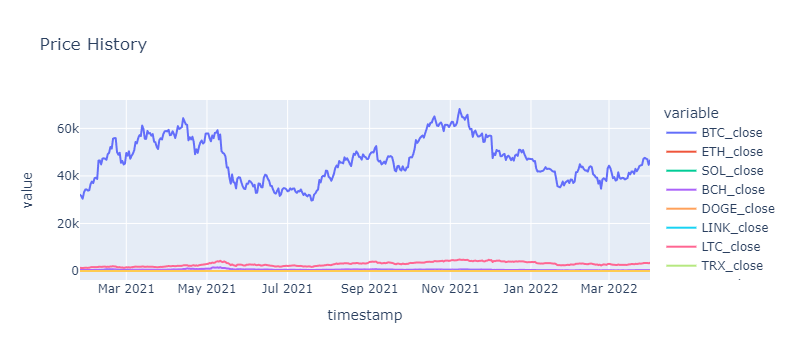

In [65]:
line_plot = px.line(
crypto_data, title="Price History")

line_plot



In [70]:
daily_returns = crypto_data.pct_change().dropna()

daily_returns.head()

,BTC_close,ETH_close,SOL_close,BCH_close,DOGE_close,LINK_close,LTC_close,TRX_close,UNI_close,BAT_close
timestamp,,,,,,,,,,
2021-01-26,-0.016777,-0.024143,-0.014455,-0.057882,-0.053786,-0.049810,-0.024143,-0.030815,0.108976,-0.031311
2021-01-27,-0.036277,-0.035136,-0.001333,-0.029442,0.460234,0.060158,-0.035136,0.001220,0.056884,0.096097
2021-01-28,0.087009,0.051911,-0.014686,0.042859,4.785363,-0.056809,0.051911,0.072473,0.036250,-0.062634
2021-01-29,0.036587,0.057064,0.038618,-0.012033,-0.536721,0.006519,0.057064,0.031070,0.021430,0.002883
2021-01-30,0.001562,-0.020422,0.159165,0.025858,-0.122574,0.042157,-0.020422,-0.014949,0.225686,0.050478


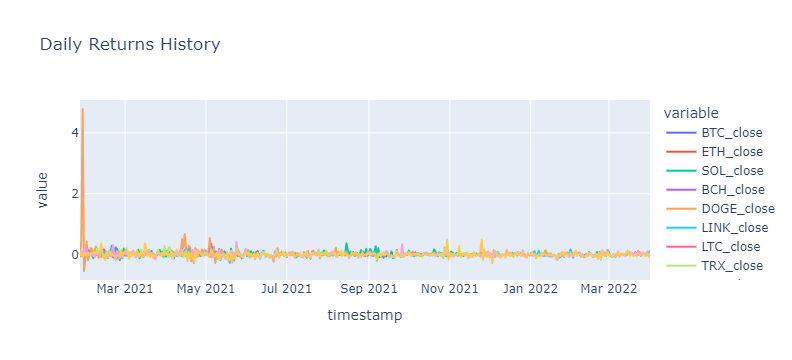

In [71]:
returns_plot = px.line(
daily_returns, title="Daily Returns History")

returns_plot

<AxesSubplot:ylabel='Frequency'>

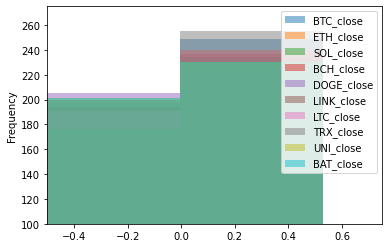

In [87]:
#histogram of daily returns - needs cleanup
daily_returns.plot.hist(alpha=0.5, ylim=(100,275), xlim=(-0.5,0.75))

<AxesSubplot:title={'center':'Daily Close Distribution'}, ylabel='Density'>

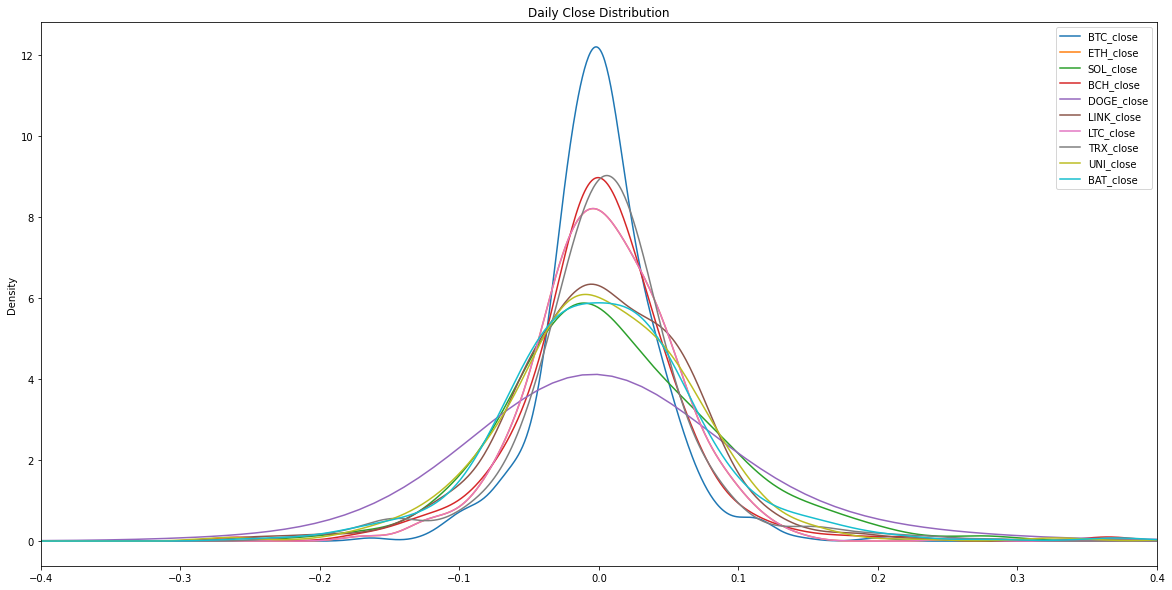

In [99]:
#Daily returns daily close distribution
daily_returns.plot.density(xlim=(-0.4,0.4), title="Daily Close Distribution", figsize=(20, 10))

In [101]:
#Daily returns standard dev
daily_returns_std = daily_returns.std()
daily_returns_std

BTC_close     0.040622
ETH_close     0.050998
SOL_close     0.077331
BCH_close     0.061095
DOGE_close    0.249655
LINK_close    0.064855
LTC_close     0.050998
TRX_close     0.061064
UNI_close     0.072029
BAT_close     0.080119
dtype: float64

In [104]:
#Sharpe Ratios
sharpe_ratios = (daily_returns.mean() * 252) / (daily_returns_std * np.sqrt(252))
sharpe_ratios.head()

BTC_close     0.657667
ETH_close     1.105038
SOL_close     2.299337
BCH_close     0.396463
DOGE_close    1.142034
dtype: float64

<AxesSubplot:title={'center':'Crypto Sharp Ratios'}>

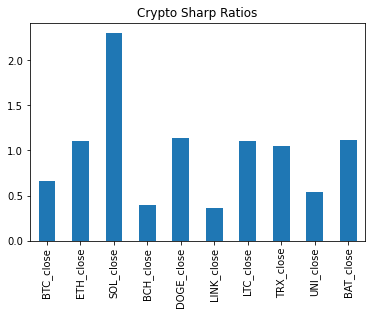

In [106]:
#Sharp Ratio plot
sharpe_ratios.plot(kind="bar",title="Crypto Sharp Ratios")

In [107]:
daily_std = daily_returns.std()
daily_std.head()

BTC_close     0.040622
ETH_close     0.050998
SOL_close     0.077331
BCH_close     0.061095
DOGE_close    0.249655
dtype: float64

In [108]:
daily_std = daily_std.sort_values(ascending=False)
daily_std.head()

DOGE_close    0.249655
BAT_close     0.080119
SOL_close     0.077331
UNI_close     0.072029
LINK_close    0.064855
dtype: float64

In [109]:
annualized_std = daily_std * np.sqrt(252)
annualized_std.head()

DOGE_close    3.963152
BAT_close     1.271848
SOL_close     1.227586
UNI_close     1.143422
LINK_close    1.029544
dtype: float64

<AxesSubplot:title={'center':'Annualized Standard Dev Returns'}>

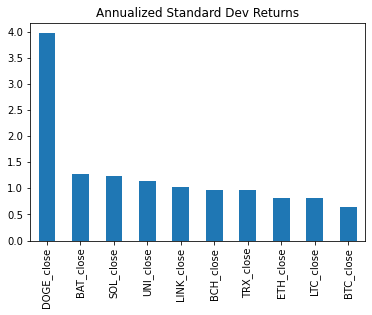

In [112]:
annualized_std.plot(kind="bar", title="Annualized Standard Dev Returns")

In [117]:
# Calculate covariance of all daily returns of crypto vs. BTC

doge_covariance = daily_returns['DOGE_close'].cov(daily_returns['BTC_close'])
bat_covariance = daily_returns['BAT_close'].cov(daily_returns['BTC_close'])
sol_covariance = daily_returns['SOL_close'].cov(daily_returns['BTC_close'])
uni_covariance = daily_returns['UNI_close'].cov(daily_returns['BTC_close'])
link_covariance = daily_returns['LINK_close'].cov(daily_returns['BTC_close'])
bch_covariance = daily_returns['BCH_close'].cov(daily_returns['BTC_close'])
trx_covariance = daily_returns['TRX_close'].cov(daily_returns['BTC_close'])
eth_covariance = daily_returns['ETH_close'].cov(daily_returns['BTC_close'])
ltc_covariance = daily_returns['LTC_close'].cov(daily_returns['BTC_close'])

In [129]:
# Calculate variance of all daily returns of crypto vs. BTC
variance = daily_returns['BTC_close'].var()
variance


0.001650187035758345

In [130]:
# Calculate beta of all daily returns of crypto
doge_beta = doge_covariance / variance
bat_beta = bat_covariance / variance
sol_beta = sol_covariance / variance
uni_beta = uni_covariance / variance
link_beta = link_covariance / variance
bch_beta = bch_covariance / variance
trx_beta = trx_covariance / variance
eth_beta = eth_covariance / variance
ltc_beta = ltc_covariance / variance

print(f"DOGE: {doge_beta} | BAT: {bat_beta} | SOL: {sol_beta} UNI: {uni_beta} | LINK: {link_beta} | BCH: {bch_beta} TRX: {trx_beta} | ETH: {eth_beta} | LTC: {ltc_beta}")

DOGE: 1.4975448256891324 | BAT: 1.17335362740414 | SOL: 0.8644804967845938 UNI: 1.1403736180822663 | LINK: 1.149330301320555 | BCH: 1.089131798753995 TRX: 1.0032497303725523 | ETH: 1.0439136863376526 | LTC: 1.0439136863376526


In [144]:
# Calculate 30-day rolling covariance of Crypto vs. BTC and plot the data
rolling_doge_covariance = daily_returns['DOGE_close'].rolling(window=30).cov(daily_returns['BTC_close'])
rolling_bat_covariance = daily_returns['BAT_close'].rolling(window=30).cov(daily_returns['BTC_close'])
rolling_sol_covariance = daily_returns['SOL_close'].rolling(window=30).cov(daily_returns['BTC_close'])
rolling_uni_covariance = daily_returns['UNI_close'].rolling(window=30).cov(daily_returns['BTC_close'])
rolling_link_covariance = daily_returns['LINK_close'].rolling(window=30).cov(daily_returns['BTC_close'])
rolling_bch_covariance = daily_returns['BCH_close'].rolling(window=30).cov(daily_returns['BTC_close'])
rolling_trx_covariance = daily_returns['TRX_close'].rolling(window=30).cov(daily_returns['BTC_close'])
rolling_eth_covariance = daily_returns['ETH_close'].rolling(window=30).cov(daily_returns['BTC_close'])
rolling_ltc_covariance = daily_returns['LTC_close'].rolling(window=30).cov(daily_returns['BTC_close'])


# Calculate 30-day rolling variance of S&P 500
rolling_variance = daily_returns['BTC_close'].rolling(window=30).var()

# Calculate 30-day rolling beta of AMZN and plot the data
rolling_doge_beta = rolling_doge_covariance / rolling_variance
rolling_bat_beta = rolling_bat_covariance / rolling_variance
rolling_sol_beta = rolling_sol_covariance / rolling_variance
rolling_uni_beta = rolling_uni_covariance / rolling_variance
rolling_link_beta = rolling_link_covariance / rolling_variance
rolling_bch_beta = rolling_bch_covariance / rolling_variance
rolling_trx_beta = rolling_trx_covariance / rolling_variance
rolling_eth_beta = rolling_eth_covariance / rolling_variance
rolling_ltc_beta = rolling_ltc_covariance / rolling_variance




In [139]:
rolling_sol_beta

timestamp
2021-01-26         NaN
2021-01-27         NaN
2021-01-28         NaN
2021-01-29         NaN
2021-01-30         NaN
                ...   
2022-03-28    3.430943
2022-03-29    3.422762
2022-03-30    3.431438
2022-03-31    3.407596
2022-04-01    3.391542
Length: 431, dtype: float64

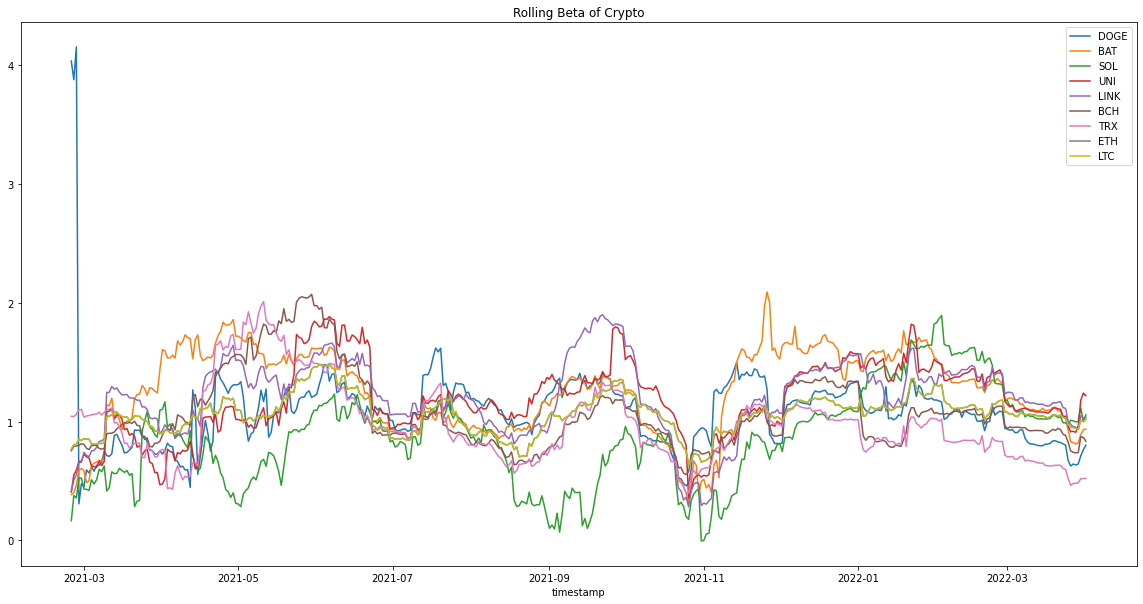

In [145]:
# Set the figure and plot the different datasets as multiple trends on the same figure
ax = rolling_doge_beta.plot(figsize=(20, 10), title='Rolling Beta of Crypto')
rolling_bat_beta.plot(ax=ax)
rolling_sol_beta.plot(ax=ax)
rolling_uni_beta.plot(ax=ax)
rolling_link_beta.plot(ax=ax)
rolling_bch_beta.plot(ax=ax)
rolling_trx_beta.plot(ax=ax)
rolling_eth_beta.plot(ax=ax)
rolling_ltc_beta.plot(ax=ax)
# Set the legend of the figure
ax.legend(["DOGE", "BAT", "SOL","UNI", "LINK", "BCH","TRX","ETH", "LTC"])